In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
from google.colab import files
import io

import matplotlib.pylab as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

!pip install dmba
import dmba
from dmba import classificationSummary
from dmba import gainsChart, liftChart 
from dmba import plotDecisionTree, regressionSummary, exhaustive_search
from dmba import stepwise_selection
from dmba.metric import AIC_score
from dmba import adjusted_r2_score, AIC_score, BIC_score

from scipy.stats import skew
from sklearn.impute import SimpleImputer

%matplotlib inline

from datetime import date

## Feature Engineering

- mean imputation for 'Income' missing values
- 'year_birth' to 'age'
- create dummy variables for 'Education' and 'Marital_Status'
- scale 'Income', 'Recency', ' MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts, 'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'

#### Missing Value Imputation

In [ ]:
# mean imputation for 24 missing Income values 
marketingCampaign['Income'] = marketingCampaign['Income'].fillna(marketingCampaign['Income'].mean())

In [ ]:
marketingCampaign.isna().sum()

#### Transforming 'Year_Birth' to an age variable

In [ ]:
marketingCampaign['Age'] = (2022 - marketingCampaign.Year_Birth)
marketingCampaign = marketingCampaign.drop(columns=['Year_Birth'])

#### Transforming 'Dt_Customer' to 'Years_Since_Enrollment'

In [ ]:
marketingCampaign['currentDate'] = pd.to_datetime(date.today())

In [ ]:
marketingCampaign['Days_Since_Enrollment'] = (marketingCampaign['currentDate'] - pd.to_datetime(marketingCampaign['Dt_Customer'])).astype('timedelta64[m]')

In [ ]:
# removing 'currentDate' and 'Dt_Customer'
marketingCampaign = marketingCampaign.drop(columns = ['currentDate', 'Dt_Customer'])

In [ ]:
list(marketingCampaign.columns)

#### Transforming Categorical Variables to Dummies

In [ ]:
marketingCampaign = pd.get_dummies(marketingCampaign, columns = ['Education', 'Marital_Status'], prefix = ['Education', 'Marital_Status'])
marketingCampaign


,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,0,0
1,2174,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,4141,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,6182,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,5324,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,0,1,0,0,0,0
2236,4001,64014.0,2,1,56,406,0,30,0,0,...,0,1,0,0,0,0,0,1,0,0
2237,7270,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,1,0,0,0,0,0
2238,8235,69245.0,0,1,8,428,30,214,80,30,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
list(marketingCampaign.columns)

['ID',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age',
 'Days_Since_Enrollment',
 'Education_2n Cycle',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_Absurd',
 'Marital_Status_Alone',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Marital_Status_YOLO']

#### Scaling Continuous Variables

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(marketingCampaign[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                              'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                              'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Days_Since_Enrollment']])

# concatenating transformed predictors with original dataframe
marketingCampaignNorm = pd.concat([pd.DataFrame(scaler.transform(marketingCampaign[['Income', 'Recency', 
                                                                                    'MntWines', 'MntFruits', 
                                                                                    'MntMeatProducts', 
                                                                                    'MntFishProducts', 
                                                                                    'MntSweetProducts', 
                                                                                    'MntGoldProds', 
                                                                                    'NumDealsPurchases', 
                                                                                    'NumWebPurchases', 
                                                                                    'NumCatalogPurchases', 
                                                                                    'NumStorePurchases', 
                                                                                    'NumWebVisitsMonth',
                                                                                    'Age',
                                                                                    'Days_Since_Enrollment']]),
                                   columns = ['zIncome', 'zRecency', 'zMntWines', 'zMntFruits', 
                                              'zMntMeatProducts', 'zMntFishProducts', 'zMntSweetProducts', 
                                              'zMntGoldProds', 'zNumDealsPurchases', 'zNumWebPurchases', 
                                              'zNumCatalogPurchases', 'zNumStorePurchases', 'zNumWebVisitsMonth',
                                              'zAge', 'zDays_Since_Enrollment']),
                                  marketingCampaign], axis = 1)

In [ ]:
marketingCampaignNorm = marketingCampaignNorm.drop(columns=['Income', 'Recency', 'MntWines', 'MntFruits', 
                                                            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                                                            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                                                            'NumCatalogPurchases', 'NumCatalogPurchases',
                                                            'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
                                                            'Days_Since_Enrollment'])

display(marketingCampaignNorm)
display(list(marketingCampaignNorm.columns))

,zIncome,zRecency,zMntWines,zMntFruits,zMntMeatProducts,zMntFishProducts,zMntSweetProducts,zMntGoldProds,zNumDealsPurchases,zNumWebPurchases,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.235327,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,...,0,0,0,0,0,0,1,0,0,0
1,-0.235826,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,...,0,0,0,0,0,0,1,0,0,0
2,0.773633,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,...,0,0,0,0,0,0,0,1,0,0
3,-1.022732,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,...,0,0,0,0,0,0,0,1,0,0
4,0.241519,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.358568,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,-0.168236,1.769263,...,0,0,0,0,0,1,0,0,0,0
2236,0.470064,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,2.420015,1.409304,...,0,1,0,0,0,0,0,1,0,0
2237,0.189106,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,-0.685887,-0.750450,...,0,0,0,0,1,0,0,0,0,0
2238,0.679035,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,-0.168236,0.689386,...,1,0,0,0,0,0,0,1,0,0


['zIncome',
 'zRecency',
 'zMntWines',
 'zMntFruits',
 'zMntMeatProducts',
 'zMntFishProducts',
 'zMntSweetProducts',
 'zMntGoldProds',
 'zNumDealsPurchases',
 'zNumWebPurchases',
 'zNumCatalogPurchases',
 'zNumStorePurchases',
 'zNumWebVisitsMonth',
 'zAge',
 'zDays_Since_Enrollment',
 'ID',
 'Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Education_2n Cycle',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_Absurd',
 'Marital_Status_Alone',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Marital_Status_YOLO']

## Modeling Phase

#### Partitioning Data

In [ ]:
# defining predictors and outcome variables for model
outcome = marketingCampaignNorm['Response']
predictors = marketingCampaignNorm[['zIncome', 'zRecency', 'zMntWines', 'zMntFruits', 'zMntMeatProducts',
                                   'zMntFishProducts', 'zMntSweetProducts', 'zMntGoldProds', 'zNumDealsPurchases',
                                   'zNumWebPurchases', 'zNumCatalogPurchases', 'zNumStorePurchases', 'zAge',
                                   'zDays_Since_Enrollment', 'zNumWebVisitsMonth', 'Kidhome', 'Teenhome', 
                                   'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
                                   'Complain', 'Z_CostContact', 'Z_Revenue', 'Education_2n Cycle', 
                                   'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 
                                   'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_Divorced',
                                   'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together',
                                   'Marital_Status_Widow', 'Marital_Status_YOLO']]

trainX, validX, trainy, validy = train_test_split(predictors, outcome, test_size = 0.4, random_state = 42)

print(trainX.shape, validX.shape)
print(trainy.shape, validy.shape)

(1344, 38) (896, 38)
(1344,) (896,)


#### Baseline Logisitic Regression, using full set of predictors

In [ ]:
# full logistic regression model with L2 penalty
lr_l2 = LogisticRegression(penalty = "l2", C = 1e42, solver = 'liblinear')
lr_l2.fit(trainX, trainy)
log_pred = lr_l2.predict(validX)

# printing model coefficients
display(pd.DataFrame({'coeff': lr_l2.coef_[0]}, index = trainX.columns))

# confusion matrix to classify purcahsers and nonpurchasers
classificationSummary(validy, lr_l2.predict(validX))

# probability of purchase
lr_l2Probs = pd.DataFrame(lr_l2.predict_proba(validX)[:, 1])

,coeff
zIncome,-0.309342
zRecency,-0.876463
zMntWines,-0.217176
zMntFruits,0.255229
zMntMeatProducts,0.411644
zMntFishProducts,-0.068736
zMntSweetProducts,0.065275
zMntGoldProds,0.342550
zNumDealsPurchases,0.151652
zNumWebPurchases,0.302752


Confusion Matrix (Accuracy 0.8873)

       Prediction
Actual   0   1
     0 741  28
     1  73  54


In [ ]:
# defining predictors and outcome variables for model
outcome = marketingCampaignNorm['Response']
predictors = marketingCampaignNorm[['zIncome', 'zRecency', 'zMntWines', 'zMntFruits', 'zMntMeatProducts',
                                   'zMntFishProducts', 'zMntSweetProducts', 'zMntGoldProds', 'zNumDealsPurchases',
                                   'zNumWebPurchases', 'zNumCatalogPurchases', 'zNumStorePurchases', 'zAge',
                                   'zDays_Since_Enrollment', 'zNumWebVisitsMonth', 'Kidhome', 'Teenhome', 
                                   'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
                                   'Complain', 'Z_CostContact', 'Z_Revenue', 'Education_2n Cycle', 
                                   'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 
                                   'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_Divorced',
                                   'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together',
                                   'Marital_Status_Widow', 'Marital_Status_YOLO']]

trainX, validX, trainy, validy = train_test_split(predictors, outcome, test_size = 0.4, random_state = 42)

print(trainX.shape, validX.shape)
print(trainy.shape, validy.shape)

(1344, 38) (896, 38)
(1344,) (896,)


In [ ]:
rf = RandomForestClassifier()
rf.fit(trainX, trainy)

rf_pred = rf.predict(validX)
rf_predprob = rf.predict_proba(validX)[:,1]
print(classificationSummary(validy, rf_pred))
print(f'precision: {precision_score(validy, rf_pred, zero_division=0)}')
print(f'recall: {recall_score(validy, rf_pred, zero_division=1)}')

Confusion Matrix (Accuracy 0.8783)

       Prediction
Actual   0   1
     0 755  14
     1  95  32
None
precision: 0.6956521739130435
recall: 0.25196850393700787


In [ ]:
dt = DecisionTreeClassifier(criterion = "gini", max_depth=3, random_state=1)
dt.fit(trainX, trainy)

dt_pred = dt.predict(validX)
dt_predprob = dt.predict_proba(validX)[:,1]
print(classificationSummary(validy, dt_pred))
print(f'precision: {precision_score(validy, dt_pred, zero_division=0)}')
print(f'recall: {recall_score(validy, dt_pred, zero_division=1)}')

Confusion Matrix (Accuracy 0.8683)

       Prediction
Actual   0   1
     0 745  24
     1  94  33
None
precision: 0.5789473684210527
recall: 0.25984251968503935


In [ ]:
for r in range (1, 10): 
    knn = KNeighborsClassifier(n_neighbors=r)
    knn.fit(trainX, trainy)

    y_pred = knn.predict(validX)
    
    print(f'neighbors: {r}')
    print(f'accuracy: {accuracy_score(validy, y_pred)}')
    print(f'precision: {precision_score(validy, y_pred, zero_division=0)}')
    print(f'recall: {recall_score(validy, y_pred, zero_division=1)}')
    print('\n')

neighbors: 1
accuracy: 0.8359375
precision: 0.40384615384615385
recall: 0.33070866141732286


neighbors: 2
accuracy: 0.8549107142857143
precision: 0.4444444444444444
recall: 0.09448818897637795


neighbors: 3
accuracy: 0.8482142857142857
precision: 0.4262295081967213
recall: 0.2047244094488189


neighbors: 4
accuracy: 0.8571428571428571
precision: 0.4827586206896552
recall: 0.11023622047244094


neighbors: 5
accuracy: 0.8616071428571429
precision: 0.5319148936170213
recall: 0.1968503937007874


neighbors: 6
accuracy: 0.8616071428571429
precision: 0.5789473684210527
recall: 0.08661417322834646


neighbors: 7
accuracy: 0.859375
precision: 0.5151515151515151
recall: 0.13385826771653545


neighbors: 8
accuracy: 0.8549107142857143
precision: 0.38461538461538464
recall: 0.03937007874015748


neighbors: 9
accuracy: 0.8571428571428571
precision: 0.47368421052631576
recall: 0.07086614173228346




In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trainX, trainy)

knn_pred = knn.predict(validX)
knn_predprob = knn.predict_proba(validX)[:,1]
print(classificationSummary(validy, knn_pred))
print(f'precision: {precision_score(validy, knn_pred, zero_division=0)}')
print(f'recall: {recall_score(validy, knn_pred, zero_division=1)}')

Confusion Matrix (Accuracy 0.8359)

       Prediction
Actual   0   1
     0 707  62
     1  85  42
None
precision: 0.40384615384615385
recall: 0.33070866141732286


In [ ]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(trainX, trainy)
ada_pred = ada_boost.predict(validX)
ada_predprob = ada_boost.predict_proba(validX)[:,1]
print(classificationSummary(validy, ada_pred))
print(f'precision: {precision_score(validy, ada_pred, zero_division=0)}')
print(f'recall: {recall_score(validy, ada_pred, zero_division=1)}')

Confusion Matrix (Accuracy 0.8817)

       Prediction
Actual   0   1
     0 737  32
     1  74  53
None
precision: 0.6235294117647059
recall: 0.41732283464566927


In [ ]:
log_df = pd.DataFrame({'actual': validy, 
                       'p(1)': lr_l2Probs,
                       'predicted': log_pred
                        })

In [ ]:
rf_df = pd.DataFrame({'actual': validy, 
                      'p(1)': rf_predprob,
                      'predicted': rf_pred,
                        })
dt_df = pd.DataFrame({'actual': validy, 
                      'p(1)': dt_predprob,
                      'predicted': dt_pred,
                        })
knn_df = pd.DataFrame({'actual': validy, 
                      'p(1)': knn_predprob,
                      'predicted': knn_pred,
                        })
ada_df = pd.DataFrame({'actual': validy, 
                      'p(1)': ada_predprob,
                      'predicted': ada_pred,
                        })


In [ ]:
rf_df = rf_df.sort_values(by=['p(1)'], ascending=False)
dt_df = ada_df.sort_values(by=['p(1)'], ascending=False)
knn_df = knn_df.sort_values(by=['p(1)'], ascending=False)
ada_df = ada_df.sort_values(by=['p(1)'], ascending=False)

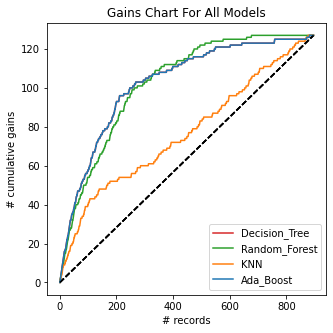

In [ ]:
ax = gainsChart(dt_df.actual, label='Decision_Tree', color='C3', figsize=[5, 5])
ax = gainsChart(rf_df.actual, label='Random_Forest', color='C2', ax=ax)
ax = gainsChart(knn_df.actual, label='KNN', color='C1', ax=ax)
ax = gainsChart(ada_df.actual, label='Ada_Boost', color='C0', ax=ax)
ax.legend()
ax.set_title('Gains Chart For All Models')
plt.show()